# Ensemble Learning

En este _notebook_ vamos a estudiar tres métodos de _Ensemble Learning_ que Scikit Learn implementa. Estos métodos son:

- Bagging
- Random Forests
- Boosting (AdaBoost)

La idea es entender cómo instanciar modelos que hacen uso de estas técnicas. Vamos a revisar primero cómo hacer Bagging en Scikit Learn.

## Bagging

Vamos a trabajar con la función `make_moons` de Scikit Learn para generar datos. Luego construiremos un clasificador que hace Bagging con 500 árboles de decisión.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier # un baggin es un ensamblaje de clasificadores, tomamos un decisión
# tree y los entrenamos por separado
from sklearn.tree import DecisionTreeClassifier

# Ejemplo basado en el libro Hands-On Machine Learning With Scikit Learn, Keras & Tensorflow

# Recordemos que random_state=42 nos permite que el programa siempre de los mismos resultados
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Aquí hacemos bagging: bootstrap=True es para hacer bagging, false es para pasting
# Estamos haciendo votar a 500 árboles de decisión
# Cada sampling captura 100 elementos
# En este caso los votos son "soft", porque pesan más los votos de los predictores que están más seguros
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

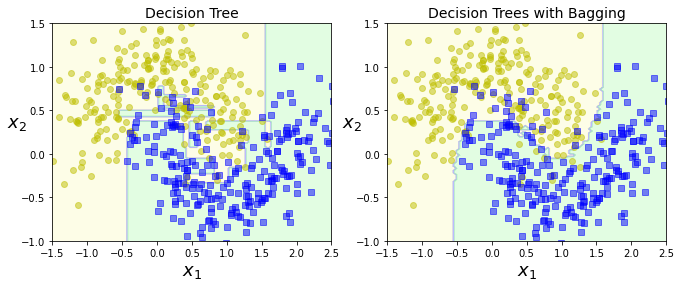

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
# Entrenamos un árbol de decisión normal para comparar
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
    
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14) #las fronteras de baggin son mucho más suaves y permiten
# acotar de mejor manera la identificación de cada valor (mejor estimación)

plt.show()

Como vemos, es posible mejorar bastante el desempeño de la predicción si en vez de uno tenemos hartos árboles. Además, podemos hacer el cálculo de la evaluación _out-of-bag_. Para esto tenemos que entrenar de nuevo, señalando que queremos la evaluación oob.

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42, oob_score=True)
bag_clf.fit(X_train, y_train)

bag_clf.oob_score_

0.9253333333333333

Y también podemos ver el puntaje para cada uno de los elementos en el dataset.

In [13]:
bag_clf.oob_decision_function_

array([[0.35579515, 0.64420485],
       [0.43513514, 0.56486486],
       [1.        , 0.        ],
       [0.01030928, 0.98969072],
       [0.03174603, 0.96825397],
       [0.07672634, 0.92327366],
       [0.39189189, 0.60810811],
       [0.06145251, 0.93854749],
       [0.92689295, 0.07310705],
       [0.88205128, 0.11794872],
       [0.59850374, 0.40149626],
       [0.04896907, 0.95103093],
       [0.7565445 , 0.2434555 ],
       [0.81377551, 0.18622449],
       [0.88528678, 0.11471322],
       [0.07407407, 0.92592593],
       [0.04738155, 0.95261845],
       [0.92051282, 0.07948718],
       [0.69974555, 0.30025445],
       [0.94358974, 0.05641026],
       [0.06100796, 0.93899204],
       [0.224     , 0.776     ],
       [0.9125964 , 0.0874036 ],
       [0.98746867, 0.01253133],
       [0.95967742, 0.04032258],
       [0.        , 1.        ],
       [0.94255875, 0.05744125],
       [1.        , 0.        ],
       [0.03466667, 0.96533333],
       [0.7020202 , 0.2979798 ],
       [0.

Ahora vamos a ver que pasa con un _Random Forest_. Recordemos que la diferencia entre hacer _bagging_ y hacer un _random forest_ es que en el _random forest_ fijamos al azar las _features_ por las que podemos hacer _split_, y el número de _features_ a fijar es el mismo para todos los árboles.

## Random Forest

Vamos a ver cómo entrenar un predictor con el algoritmo _Random Forest_ en Scikit Learn.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42) # número de
# estimadores y máximo de nodos en las hojas
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

Y ahora una buena idea es comparar las predicciones del _Random Forest_ con nuesto `bag_clf`.

In [21]:
y_pred = bag_clf.predict(X_test)
y_pred_rf = rnd_clf.predict(X_test)

np.sum(y_pred == y_pred_rf) / len(y_pred)

0.976

## Random Forest sobre el dataset MNist

Ahora vamoos a ver un ejemplo de cómo utilizar un modelo basado en Random Forest para hacer clasificación sobre el _dataset_ MNist.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

X_train.shape

(60000, 784)

Vemos que la dimensión del dataset de entrenamiento es $60000 \times 784$. Por decirlo de alguna forma, las imágenes ya están "estiradas". Ahoroa vamos a entrenar el clasificador y vamos a medir su desempeño.

In [15]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_predict = rf_classifier.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

